In [3]:
import numpy as np

PATH = '../data/train/npy/'
FILE_NAME = 'train'
N = 39
LABELS_END_WITH = '.labels.npz'
DATA_END_WITH = '.npy'

In [4]:
with open(PATH + 'feature_names.txt', 'r') as f:
    feature_names = f.read().splitlines()

### Feature format
+ 270 {30 MFCCs + 30∆ + 30∆∆} (90 means, 90 variances, 90 ranges)
+ 51 spectral contraction (17 means, 17 variances, 17 ranges)
+ 51 spectral flatness (17 means, 17 variances, 17 ranges)
+ 51 fluctogram (17 means, 17 variances, 17 ranges)
+ 51 spectral energy (17 means, 17 variances, 17 ranges)
+ 51 spectral power (17 means, 17 variances, 17 ranges)
+ 51 spectral flux (17 means, 17 variances, 17 ranges)
+ 51 spectral centroid (17 means, 17 variances, 17 ranges)

In [5]:
data_files = [PATH + FILE_NAME + format(i, '02d') + DATA_END_WITH for i in range(1, N+1)]
label_files = [PATH + FILE_NAME + format(i, '02d') + LABELS_END_WITH for i in range(1, N+1)]

In [6]:
npylist = [np.load(e, mmap_mode='r') for e in data_files]
data = np.concatenate(npylist)

In [7]:
npylist = [np.load(e, mmap_mode='r') for e in label_files]
female_labels = np.concatenate([e['female'][:,0] for e in npylist])
male_labels = np.concatenate([e['male'][:,0] for e in npylist])
choral_labels = np.concatenate([e['choral'][:,0] for e in npylist])

In [8]:
import sklearn
from sklearn.model_selection import train_test_split
from sklearn import svm

In [9]:
print(data.shape, female_labels.shape, male_labels.shape, choral_labels.shape)
data_train, data_test, female_train, female_test, male_train, male_test, choral_train, choral_test = train_test_split(data, female_labels, male_labels, choral_labels, train_size = 0.1, test_size=0.05, random_state=42)

(318816, 627) (318816,) (318816,) (318816,)


In [12]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

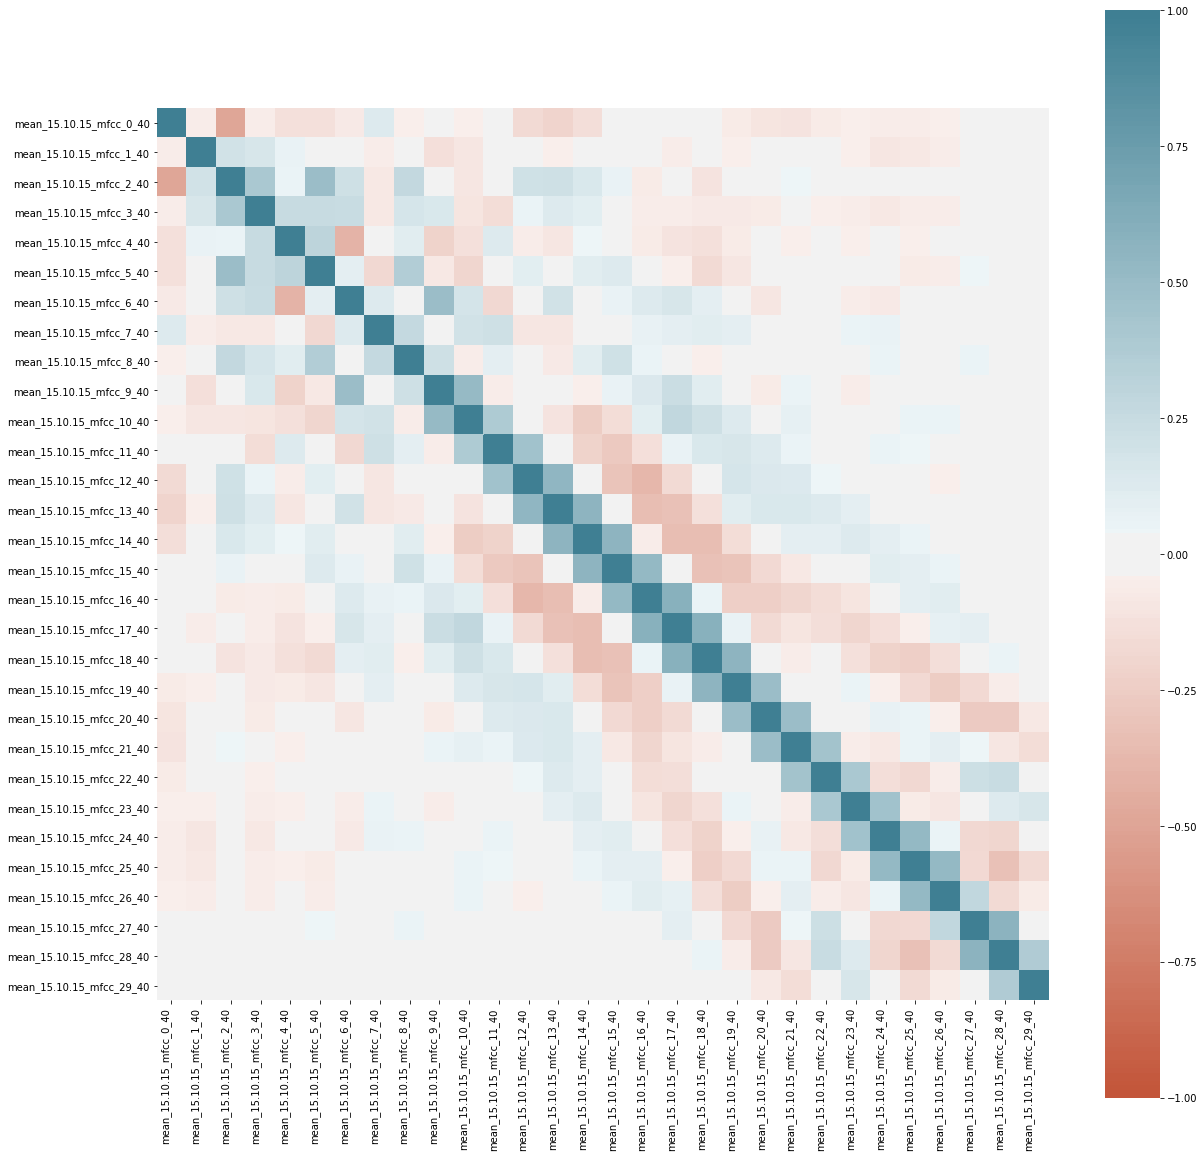

In [13]:
data = pd.DataFrame(data_train, columns = feature_names)
test = data.iloc[:,0:30]

corr = test.corr()
plt.figure(figsize = (20,20))
ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True,
    annot=False
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=90,
    horizontalalignment='right'
);

In [14]:
#corr = data.corr()
#c1 = corr.abs().unstack().drop_duplicates().sort_values(ascending = False)
#c1.head(20)

In [15]:
def tiple_heatmap(data, start, length, title):
    fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(20,7))
    test = data.iloc[:,start:start+length]
    corr = test.corr()
    fig.suptitle(title, fontsize=16)

    ax1.set_title("mean")

    ht1 = sns.heatmap(
        corr, 
        vmin=-1, vmax=1, center=0,
        cmap=sns.diverging_palette(20, 220, n=200),
        square=True,
        annot=False,
        ax = ax1
    )
    ht1.set_xticklabels(
        ax.get_xticklabels(),
        rotation=90,
        horizontalalignment='right'
    );

    test = data.iloc[:,start+length:start+2*length]

    corr = test.corr()

    ax2.set_title("var")

    ht2 = sns.heatmap(
        corr, 
        vmin=-1, vmax=1, center=0,
        cmap=sns.diverging_palette(20, 220, n=200),
        square=True,
        annot=False,
        ax = ax2
    )
    ht2.set_xticklabels(
        ax.get_xticklabels(),
        rotation=90,
        horizontalalignment='right'
    );

    test = data.iloc[:,start+2*length:start+3*length]

    corr = test.corr()
    ax3.set_title("range")
    ht3 = sns.heatmap(
        corr, 
        vmin=-1, vmax=1, center=0,
        cmap=sns.diverging_palette(20, 220, n=200),
        square=True,
        annot=False,
        ax = ax3
    )
    ht3.set_xticklabels(
        ax.get_xticklabels(),
        rotation=90,
        horizontalalignment='right'
    );
    fig.tight_layout()

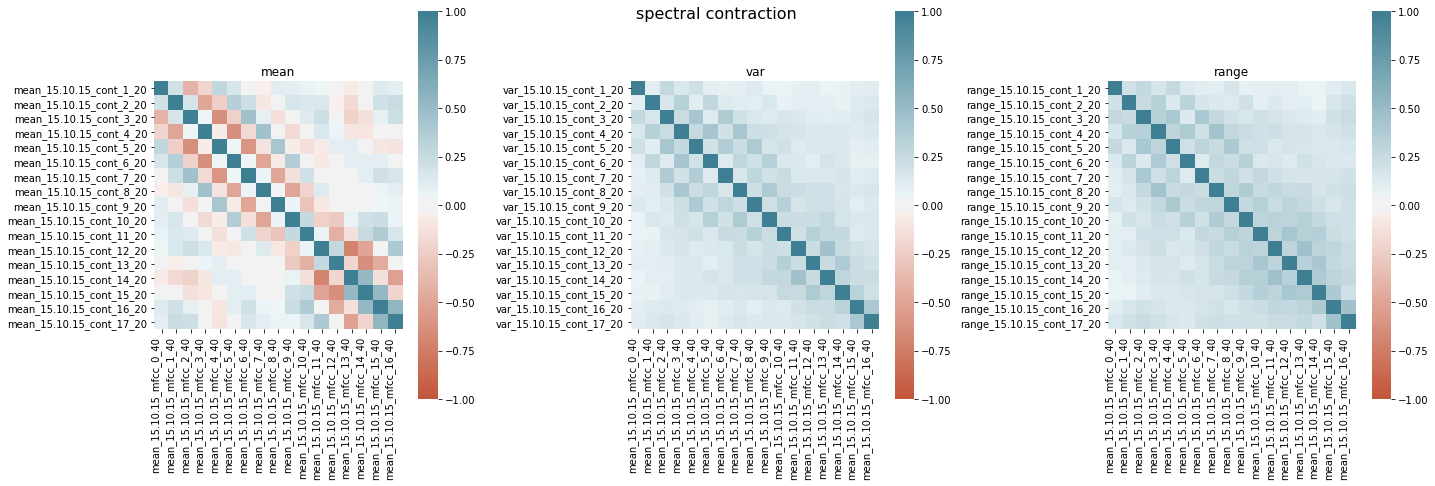

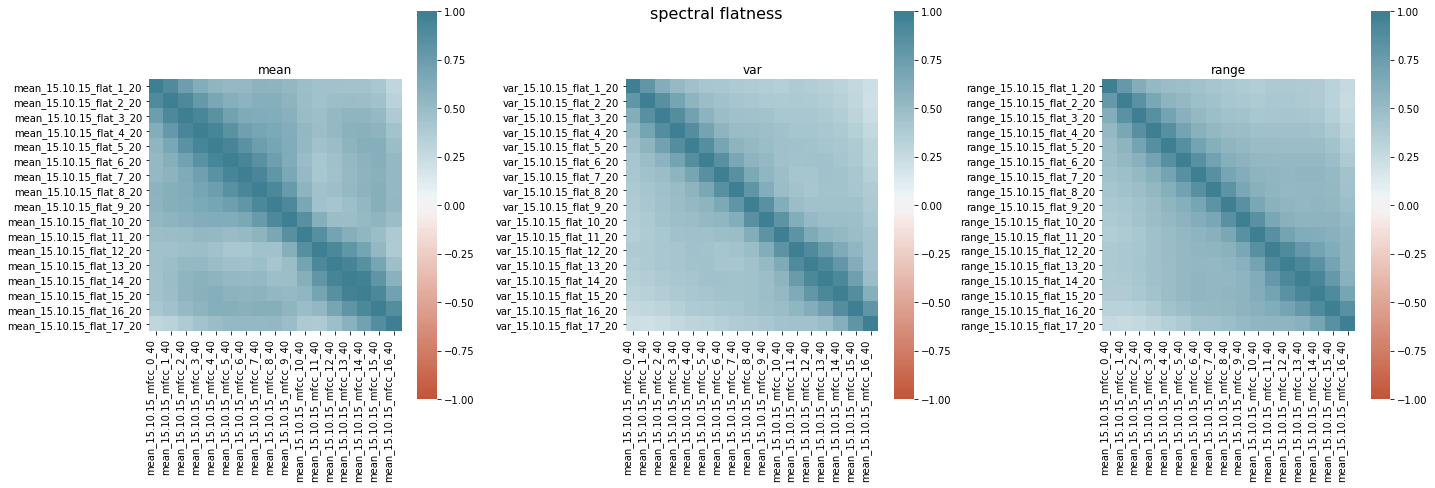

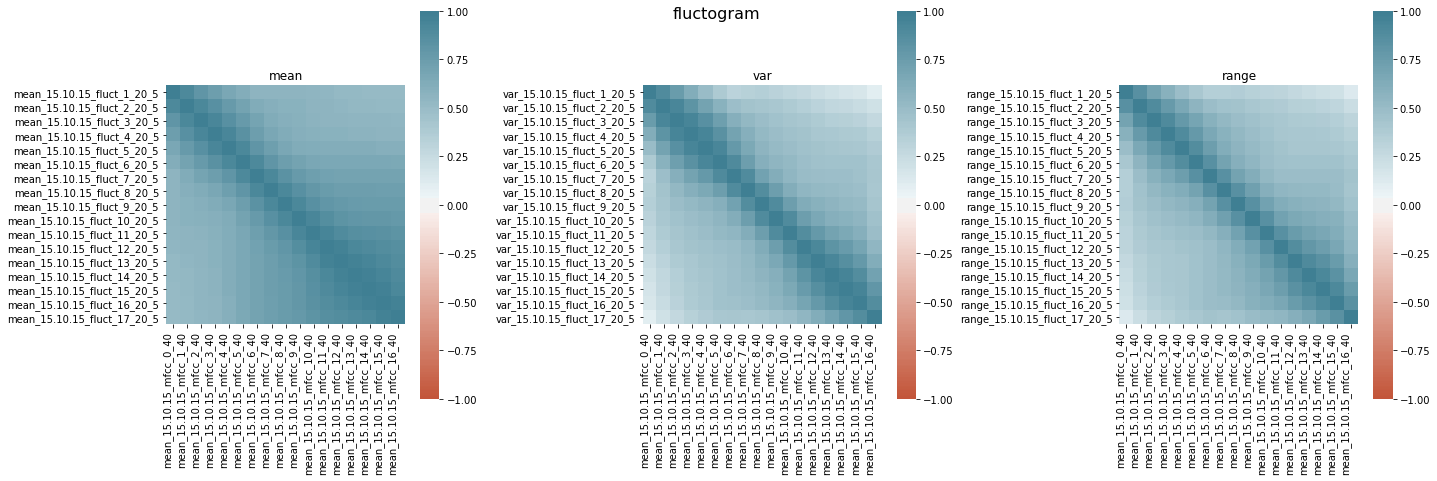

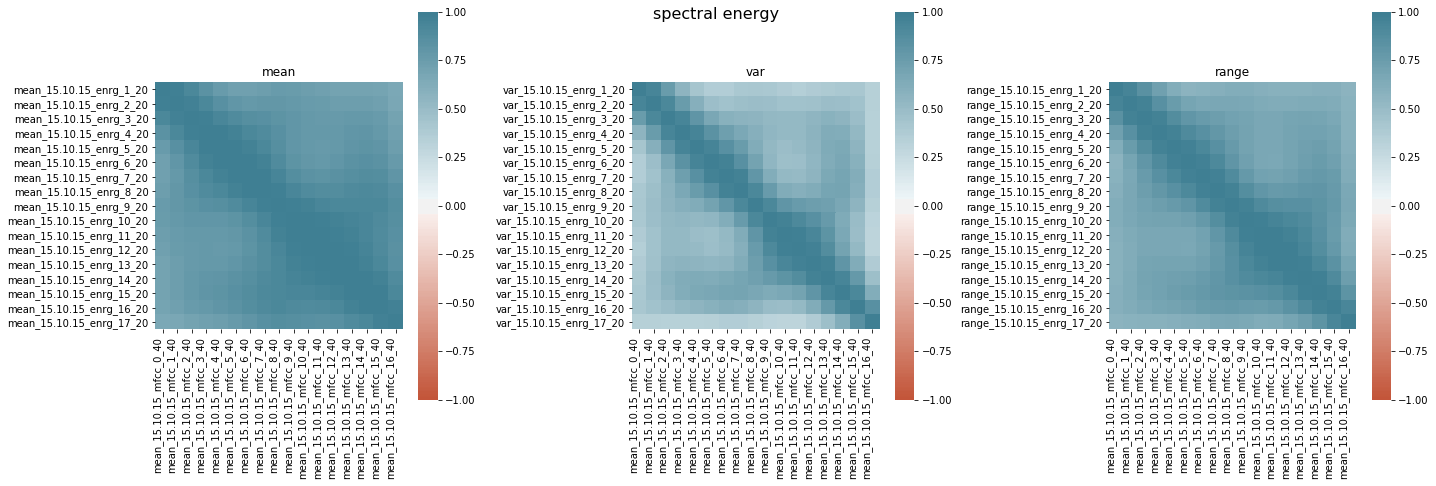

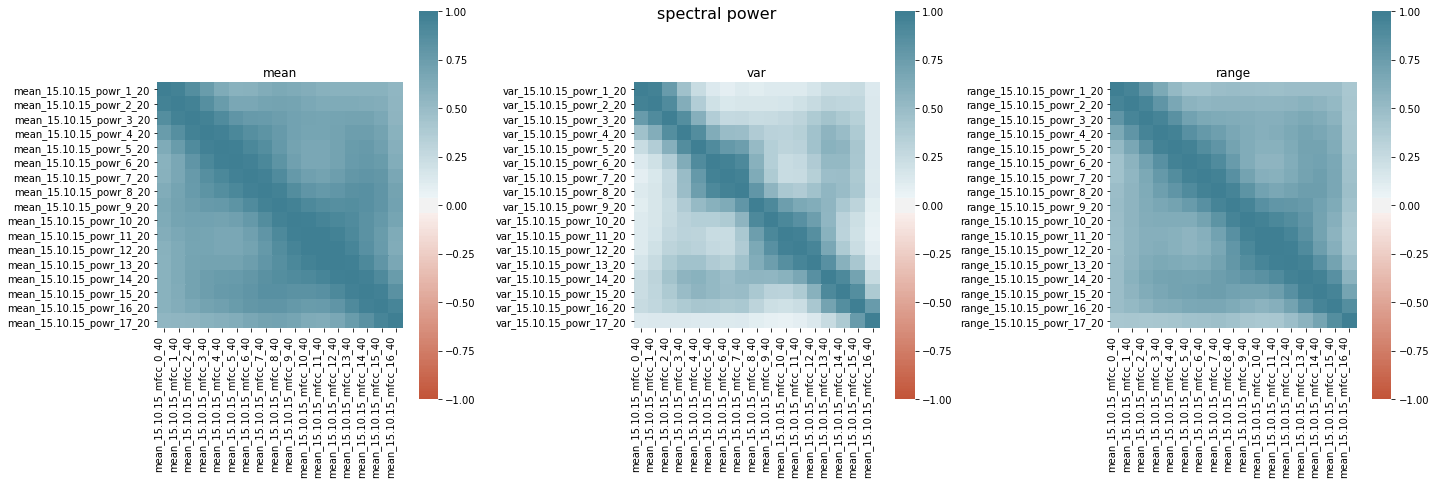

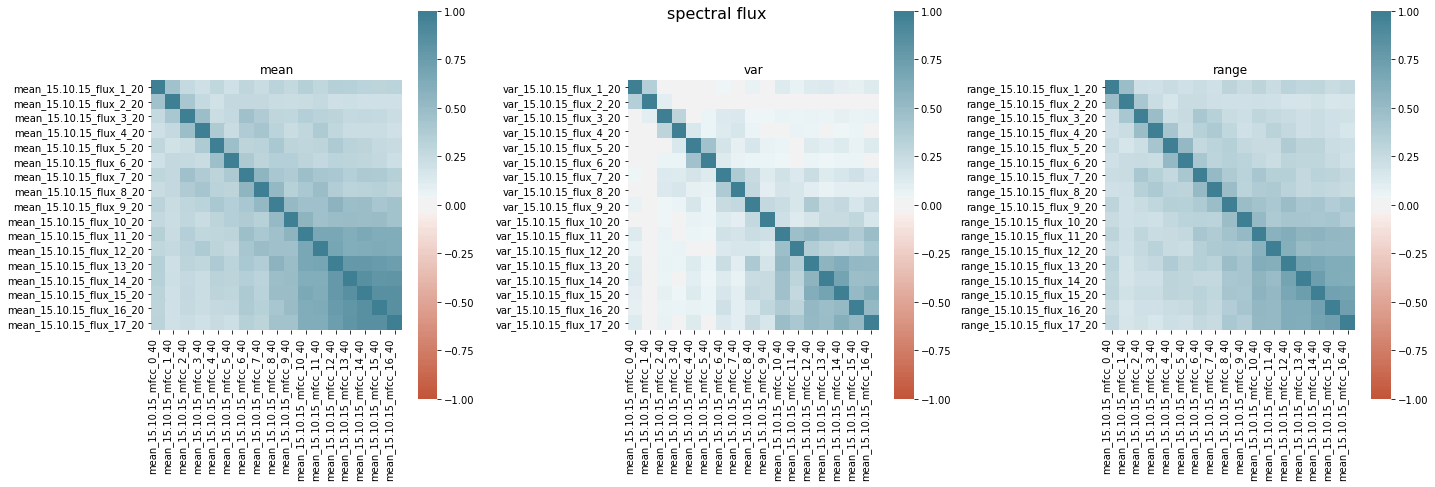

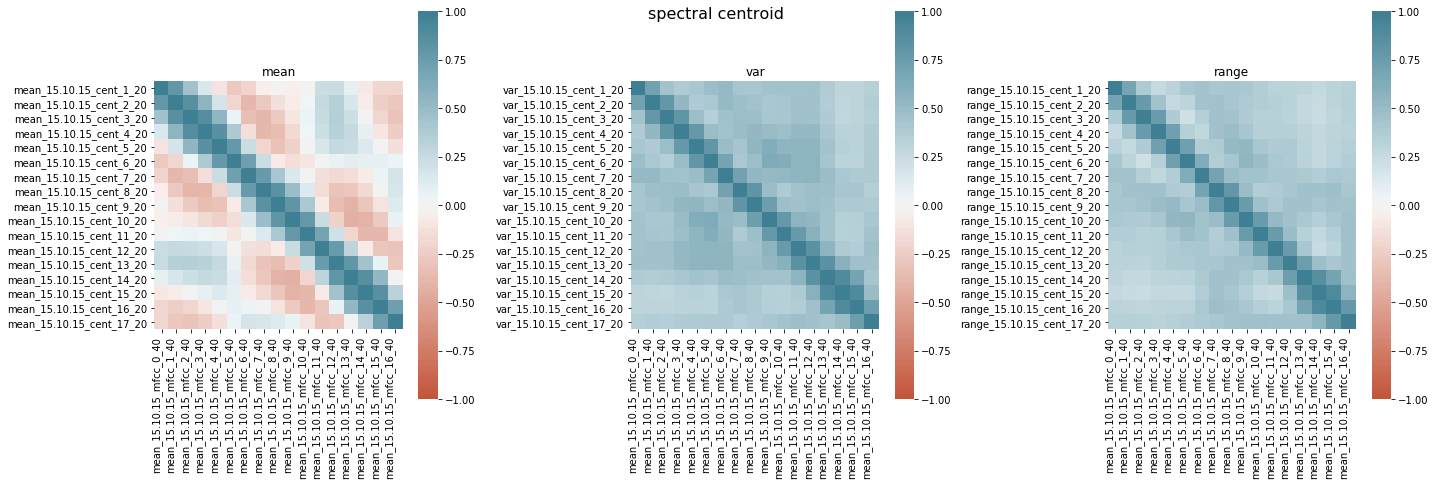

In [16]:
tiple_heatmap(data, 270, 17, 'spectral contraction')
tiple_heatmap(data, 321, 17, 'spectral flatness')
tiple_heatmap(data, 372, 17, 'fluctogram')
tiple_heatmap(data, 423, 17, 'spectral energy')
tiple_heatmap(data, 474, 17, 'spectral power')
tiple_heatmap(data, 525, 17, 'spectral flux')
tiple_heatmap(data, 576, 17, 'spectral centroid')

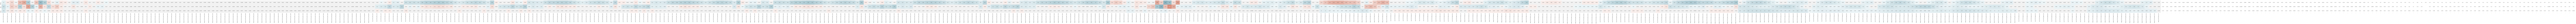

In [17]:
labels = pd.DataFrame({"female": female_train, "male": male_train, "choral": choral_train})
corr_female = data.corrwith(labels["female"])
corr_male = data.corrwith(labels["male"])
corr_choral = data.corrwith(labels["choral"])
corr = pd.concat([corr_female, corr_male, corr_choral], axis=1)
corr.columns = ["female", "male", "choral"]
corr = corr.transpose()
plt.figure(figsize = (700,4))
ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True,
    annot=True,
    cbar=False
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=90,
    horizontalalignment='right'
);

In [18]:
column_name = "mean_15.10.15_mfcc_6_40"

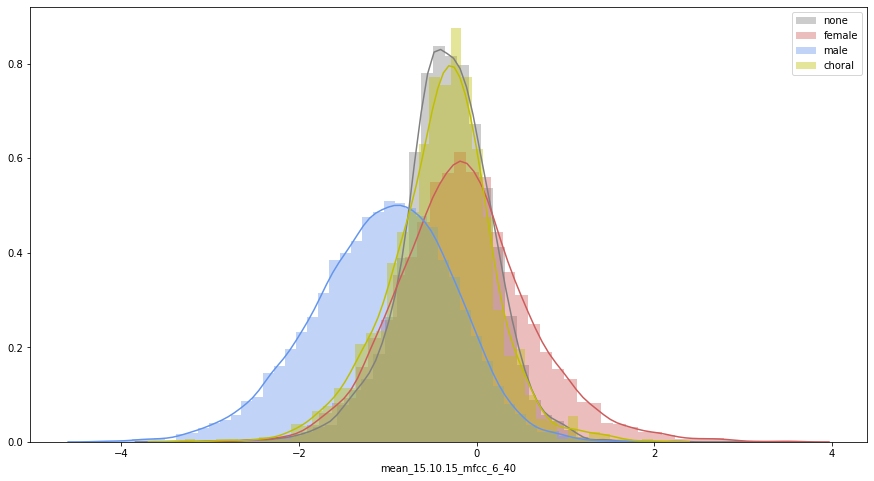

In [19]:
plt.figure(figsize = (15,8))
sns.distplot( data[column_name][(labels["female"] == 0) & (labels["male"] == 0) & (labels["choral"] == 0)] , color="grey", label="none")
sns.distplot( data[column_name][labels["female"] == 1] , color="indianred", label="female")
sns.distplot( data[column_name][labels["male"] == 1] , color="cornflowerblue", label="male")
sns.distplot( data[column_name][labels["choral"] == 1] , color="y", label="choral")
plt.legend()